In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
house = pd.read_csv('boston.csv')

# PREDICTING HOUSING PRICE

In [ ]:

house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 1. Split Data

In [ ]:
from sklearn.model_selection import train_test_split

feature = house.drop(columns = 'medv')
target = house[['medv']]

feature_house_train, feature_house_test, target_house_train, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Assuming you have a DataFrame called feature_admit_train with your predictor variables

X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                      index=X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']

vif_df


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


## There are several features with high VIF scores:


1.   rad
2.   tax





# 2. Feature selection on highly correlated features

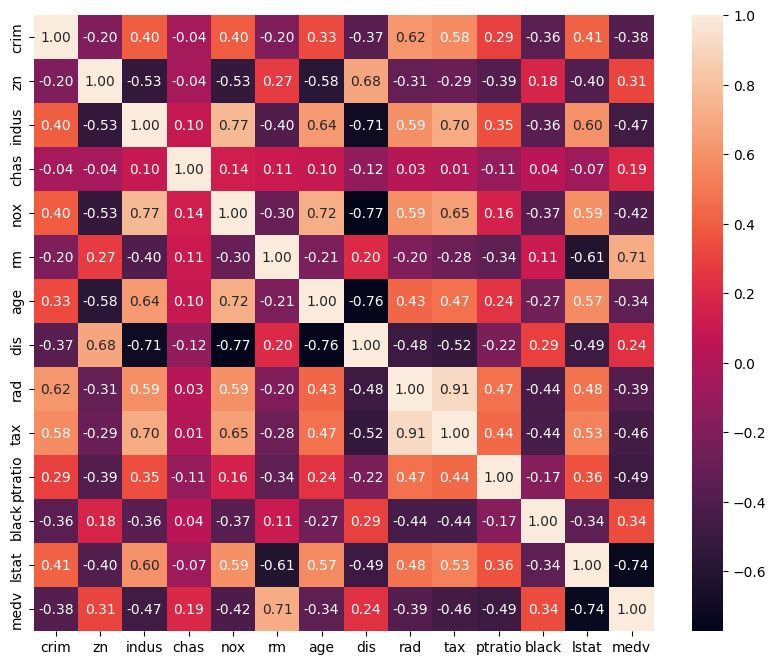

In [ ]:
# using heatmap correlation
admit_train = pd.concat([feature_house_train, target_house_train], axis=1)
correlation = admit_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()


## Observation :

*   Threshold: abs(corr) >=0.8
*   There are 2 features with high correlation, rad and tax



In [ ]:
feature_house_train = feature_house_train.drop(columns=['rad', 'tax'])
feature_house_test = feature_house_test.drop(columns=['rad', 'tax'])

## Recheck VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df



,feature,vif_score
1,crim,1.411910
2,zn,2.233054
3,indus,3.229591
4,chas,1.083338
5,nox,3.988711
6,rm,1.866058
7,age,2.951810
8,dis,4.159840
9,ptratio,1.492126
10,black,1.288546


# 3. Fit models on training data (lambdas = 0.01 , 0.1 , 1 , 10)

## a. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_house_train, y_house_train)
ridge_reg_pointone.fit(X_house_train, y_house_train)
ridge_reg_one.fit(X_house_train, y_house_train)
ridge_reg_ten.fit(X_house_train, y_house_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define the model
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)

# fit the model (training)
ridge_reg_pointone.fit(X_house_train, y_house_train)


Ridge(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients

data = feature_house_train
model = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df


,feature,coefficient
0,intercept,23.223323
1,crim,-0.077727
2,zn,0.023727
3,indus,-0.012858
4,chas,3.084618
5,nox,-14.052462
6,rm,4.743093
7,age,-0.010844
8,dis,-1.415115
9,ptratio,-0.786719


## b. Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_admit_train = feature_house_train.to_numpy()
y_admit_train = target_house_train.to_numpy()
y_admit_train = y_house_train.reshape(len(y_house_train),)

# ddefine 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_house_train, y_house_train)
lasso_reg_pointone.fit(X_house_train, y_house_train)
lasso_reg_one.fit(X_house_train, y_house_train)
lasso_reg_ten.fit(X_house_train, y_house_train)

Lasso(alpha=10, random_state=42)

In [ ]:

from sklearn.linear_model import Lasso

lasso_reg_pointone = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg_pointone.fit(X_house_train, y_house_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients

data = feature_house_train
model = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.597822
1,crim,-0.085472
2,zn,0.023614
3,indus,-0.086109
4,chas,1.272463
5,nox,-0.000000
6,rm,4.532058
7,age,-0.016738
8,dis,-1.131954
9,ptratio,-0.694916


# 4. Choose the best lambda from the validation set


In [ ]:
from sklearn.model_selection import train_test_split

feature = house.drop(columns = 'medv')
target = house[['medv']]

# splitting pretrain and test
feature_house_pretrain, feature_house_test, target_house_pretrain, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# splitting train and validation
feature_house_train, feature_house_validation, target_house_train, target_house_validation = train_test_split(feature, target, test_size=0.20, random_state=42)

## Drop multicollinear features


In [ ]:
feature_house_train = feature_house_train.drop(columns=['rad','tax'])
feature_house_validation = feature_house_validation.drop(columns=['rad','tax'])
feature_house_test = feature_house_test.drop(columns=['rad','tax'])

## Train multiple models with different alphas (lambda)


## a. Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_house_train, y_house_train)
ridge_reg_pointone.fit(X_house_train, y_house_train)
ridge_reg_one.fit(X_house_train, y_house_train)
ridge_reg_ten.fit(X_house_train, y_house_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_house_validation = feature_house_validation.to_numpy()
y_house_validation = target_house_validation.to_numpy()
y_house_validation = y_house_validation.reshape(len(y_house_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_house_validation)
    rmse = np.sqrt(mean_squared_error(y_house_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')


RMSE of Ridge regression model with alpha = 0.01 is 5.147398457363689
RMSE of Ridge regression model with alpha = 0.1 is 5.145084821309356
RMSE of Ridge regression model with alpha = 1.0 is 5.140968287138582
RMSE of Ridge regression model with alpha = 10 is 5.134733196347523


### We can see that Ridge with `alpha=10` has the smalles RMSE --> The best model

### Coefficient


In [ ]:
ridge_best = ridge_reg_ten


coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,18.080114
1,crim,-0.084650
2,zn,0.025122
3,indus,-0.089924
4,chas,2.072943
5,nox,-1.803222
6,rm,4.416635
7,age,-0.016906
8,dis,-1.220493
9,ptratio,-0.712329


## Sample coeff Interpretation:
### medv = +18.08 - 0.08 crim + 0.025 zn - 0.08 indus + 2.07 chas - 1.08 nox + 4.41 rm - 0.01 age - 1.22 dis - 0.71 ptratio + 0.01 black - 0.55 Istat

### sample interpretation: dalam setiap peningkatan 1 point `zn` (lahan untuk perumahan), sedangkan fitur yang lainnya tetap, maka berhubungan dengan peningkatan 0.025 point dalam `medv`(harga rumah median)

## b. Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_admit_train = feature_house_train.to_numpy()
y_admit_train = target_house_train.to_numpy()
y_admit_train = y_house_train.reshape(len(y_house_train),)

# ddefine 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_house_train, y_house_train)
lasso_reg_pointone.fit(X_house_train, y_house_train)
lasso_reg_one.fit(X_house_train, y_house_train)
lasso_reg_ten.fit(X_house_train, y_house_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_house_validation = feature_house_validation.to_numpy()
y_house_validation = target_house_validation.to_numpy()
y_house_validation = y_house_validation.reshape(len(y_house_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_house_validation)
    rmse = np.sqrt(mean_squared_error(y_house_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.140061900228605
RMSE of Lasso regression model with alpha = 0.1 is 5.18266104043835
RMSE of Lasso regression model with alpha = 1.0 is 5.165596306424116
RMSE of Lasso regression model with alpha = 10 is 5.915760966433104


### We can see that Ridge with `alpha=0.01` has the smalles RMSE --> The best model

In [ ]:
lasso_best = lasso_reg_pointzeroone


coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.058422
1,crim,-0.078836
2,zn,0.023707
3,indus,-0.023655
4,chas,2.902089
5,nox,-12.082972
6,rm,4.727225
7,age,-0.011904
8,dis,-1.377258
9,ptratio,-0.772972


## Sample coeff Interpretation:
### medv = + 22.05 - 0.07 crim + 0.023 zn - 0.023 indus + 2.90 chas - 12.08 nox + 4.72 rm - 0.01 age - 1.37 dis - 0.77 ptratio + 0.01 black - 0.50 Istat

### sample interpretation: dalam setiap peningkatan 1 point `zn` (lahan untuk perumahan), sedangkan fitur yang lainnya tetap, maka berhubungan dengan peningkatan 0.023 point dalam `medv` (harga rumah median)

# 5. Evaluate the best models on the test data

## a. Ridge

In [ ]:
ridge_best = ridge_reg_ten


coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,18.080114
1,crim,-0.084650
2,zn,0.025122
3,indus,-0.089924
4,chas,2.072943
5,nox,-1.803222
6,rm,4.416635
7,age,-0.016906
8,dis,-1.220493
9,ptratio,-0.712329


## Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_house_train)

print('R-squared for training data is {}'.format(r2_score(y_house_train, y_predict_train)))

R-squared for training data is 0.7352587844070446


## Interpretation : 73.52% of variability of medv is successfully explained using all the features in the model

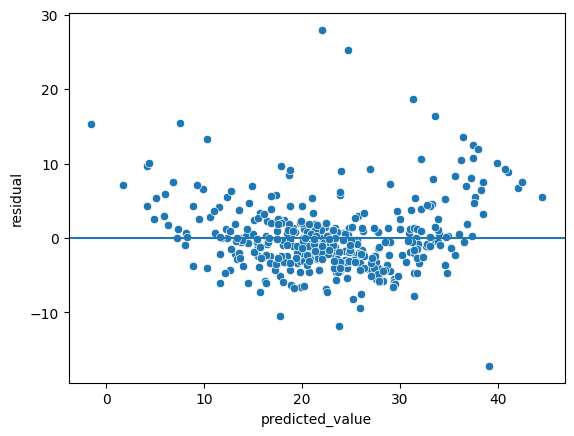

In [ ]:
# calculate residuals
residual = y_house_train - y_predict_train

# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: Yes. Garis horizontal berada pada y=0 cukup merepresentasikan keseluruhan titik residual.
2. Variance stable: No. Variasinya itu dari kecil (di bagian kiri) ke lebar (di bagian kanan)
3. Independent residual: Yes. Tidak ada pattern yang mencolok pada residuals yang berdekatan.

## Training Error

In [ ]:
## prepare prediction result on training data
y_predict_train = ridge_best.predict(X_house_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_house_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_house_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_house_train, y_predict_train)))

RMSE for training data is 4.795724192802886
MAE for training data is 3.3442085752218658
MAPE for training data is 0.16613408665252005


## Kesimpulan:
### Training performance : acceptable, tidak underfitting, tidak overfitting. Karena MAPE berada < 30% yaitu 16,61%, artinya error/kesalahan yang terjadi hanya 16,61%

## Testing Error

In [ ]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = ridge_best.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_house_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_house_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_house_test, y_predict_test)))

RMSE for testing data is 5.134733196347523
MAE for testing data is 3.259948906607099
MAPE for testing data is 0.1755540872445869


## b. Lasso

In [ ]:
lasso_best = lasso_reg_pointzeroone


coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.058422
1,crim,-0.078836
2,zn,0.023707
3,indus,-0.023655
4,chas,2.902089
5,nox,-12.082972
6,rm,4.727225
7,age,-0.011904
8,dis,-1.377258
9,ptratio,-0.772972


## Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_house_train)

print('R-squared for training data is {}'.format(r2_score(y_house_train, y_predict_train)))

R-squared for training data is 0.7428032014338593


## Interpretation : 74.28% of variability of medv is successfully explained using all the features in the model

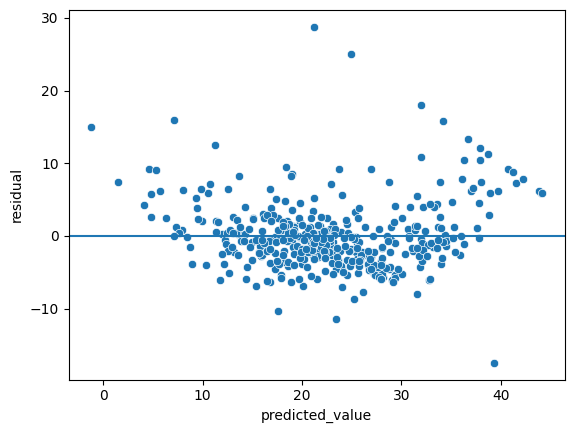

In [ ]:
# calculate residuals
residual = y_house_train - y_predict_train

# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: Yes. Garis horizontal berada pada y=0 cukup merepresentasikan keseluruhan titik residual.
2. Variance stable: No. Variasinya itu dari kecil (di bagian kiri) ke lebar (di bagian kanan)
3. Independent residual: Yes. Tidak ada pattern yang mencolok pada residuals yang berdekatan.

## Training Error

In [ ]:
# prepare prediction result on training data
y_predict_train = lasso_best.predict(X_house_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_house_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_house_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_house_train, y_predict_train)))

RMSE for training data is 4.726897645007789
MAE for training data is 3.3002934720534576
MAPE for training data is 0.16372510530783824


## Kesimpulan:
### Training performance : acceptable, tidak underfitting, tidak overfitting. Karena MAPE berada < 30% yaitu 16,37%, artinya error/kesalahan yang terjadi hanya 16,37%

## Testing Error

In [ ]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = lasso_best.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_house_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_house_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_house_test, y_predict_test)))

RMSE for testing data is 5.140061900228605
MAE for testing data is 3.317670783797216
MAPE for testing data is 0.1782036225088787
